In [10]:
import shap
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

In [8]:
df = pd.read_pickle("mainframe.df")

In [9]:
df.head()

,JD,Body,RA,Dec,Dist,Dist_Sun
0,2.269654e+06,Mars,3.487497,21.451444,0.711,1.571
1,2.269654e+06,Venus,21.054519,-17.279167,1.313,0.726
2,2.269654e+06,Sun,18.709083,-22.854583,0.983,0.000
3,2.269674e+06,Mars,3.661069,22.048583,0.877,1.594
4,2.269674e+06,Venus,22.628439,-9.896944,1.199,0.723


In [15]:
df_mars =  df[df["Body"] =="Mars"]

In [20]:
df_mars.drop(labels=["Body"], axis=1, inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [24]:
df_mars = df_mars.reset_index()

In [36]:
df_mars_output = df_mars[1:]
df_mars_output = df_mars_output.reset_index()
df_mars.drop(labels=['index'],axis=1,inplace=True)
df_mars_output.drop(labels=['index', 'level_0'],axis=1,inplace=True)

In [39]:
df_mars_output.tail()

,JD,RA,Dec,Dist,Dist_Sun
1820,2.306078e+06,8.320858,20.745444,1.880,1.587
1821,2.306098e+06,9.121661,17.994306,1.737,1.608
1822,2.306118e+06,9.847789,14.867500,1.576,1.627
1823,2.306138e+06,10.488392,11.726556,1.399,1.642
1824,2.306158e+06,11.023069,8.972083,1.213,1.653


In [40]:
df_mars.tail()

,JD,RA,Dec,Dist,Dist_Sun
1821,2.306078e+06,8.320858,20.745444,1.880,1.587
1822,2.306098e+06,9.121661,17.994306,1.737,1.608
1823,2.306118e+06,9.847789,14.867500,1.576,1.627
1824,2.306138e+06,10.488392,11.726556,1.399,1.642
1825,2.306158e+06,11.023069,8.972083,1.213,1.653


In [42]:
df_mars_input = df_mars[:-1]
df_mars_input = df_mars_input.reset_index()
df_mars_input.drop(labels=['index'],axis=1,inplace=True)

In [56]:
dfm = pd.concat([df_mars_input, df_mars_output],axis=1)
dfm.columns = ['JD_in', 'RA_in', 'Dec_in', 'Dist_in', 'Dist_Sun_in', 'JD_out', 'RA_out', 'Dec_out', 'Dist_out', 'Dist_Sun_out']

In [57]:
dfm.head()

,JD_in,RA_in,Dec_in,Dist_in,Dist_Sun_in,JD_out,RA_out,Dec_out,Dist_out,Dist_Sun_out
0,2.269654e+06,3.487497,21.451444,0.711,1.571,2.269674e+06,3.661069,22.048583,0.877,1.594
1,2.269674e+06,3.661069,22.048583,0.877,1.594,2.269694e+06,4.090064,23.220889,1.067,1.614
2,2.269694e+06,4.090064,23.220889,1.067,1.614,2.269714e+06,4.686331,24.429500,1.267,1.631
3,2.269714e+06,4.686331,24.429500,1.267,1.631,2.269734e+06,5.391289,25.230889,1.466,1.645
4,2.269734e+06,5.391289,25.230889,1.466,1.645,2.269754e+06,6.164808,25.316667,1.659,1.656


In [62]:
df_sun =  df[df["Body"] =="Sun"]

df_sun.drop(labels=["Body"], axis=1, inplace=True)

df_sun = df_sun[:-1]
df_sun = df_sun.reset_index()
df_sun.drop(labels=['index'],axis=1,inplace=True)

full = pd.concat([dfm, df_sun],axis=1)
full.columns = ['JD_in', 'RA_in', 'Dec_in', 'Dist_in', 'Dist_Sun_in', 'JD_out', 
                'RA_out', 'Dec_out', 'Dist_out', 'Dist_Sun_out', 'JD_sun', "RA_Sun_in", 'Dec_Sun_in', 'Earth_to_Sun_in', 'Dist_Sun_Sun_in']
full = full[["RA_in", "Dec_in", "Dist_in", "Dist_Sun_in", "RA_Sun_in", "Dec_Sun_in", "Earth_to_Sun_in", 'RA_out', 'Dec_out', 'Dist_out', 'Dist_Sun_out']]
full.head()

,RA_in,Dec_in,Dist_in,Dist_Sun_in,RA_Sun_in,Dec_Sun_in,Earth_to_Sun_in,RA_out,Dec_out,Dist_out,Dist_Sun_out
0,3.487497,21.451444,0.711,1.571,18.709083,-22.854583,0.983,3.661069,22.048583,0.877,1.594
1,3.661069,22.048583,0.877,1.594,20.156003,-19.821972,0.985,4.090064,23.220889,1.067,1.614
2,4.090064,23.220889,1.067,1.614,21.521192,-13.271417,0.988,4.686331,24.429500,1.267,1.631
3,4.686331,24.429500,1.267,1.631,22.800764,-6.348389,0.993,5.391289,25.230889,1.466,1.645
4,5.391289,25.230889,1.466,1.645,0.023656,0.152556,0.999,6.164808,25.316667,1.659,1.656


In [64]:
X = full.drop(labels=['RA_out','Dec_out', 'Dist_out','Dist_Sun_out'],axis=1)
X.head()

,RA_in,Dec_in,Dist_in,Dist_Sun_in,RA_Sun_in,Dec_Sun_in,Earth_to_Sun_in
0,3.487497,21.451444,0.711,1.571,18.709083,-22.854583,0.983
1,3.661069,22.048583,0.877,1.594,20.156003,-19.821972,0.985
2,4.090064,23.220889,1.067,1.614,21.521192,-13.271417,0.988
3,4.686331,24.429500,1.267,1.631,22.800764,-6.348389,0.993
4,5.391289,25.230889,1.466,1.645,0.023656,0.152556,0.999


In [65]:
y = full['RA_out']
y.head()

0    3.661069
1    4.090064
2    4.686331
3    5.391289
4    6.164808
Name: RA_out, dtype: float64

In [13]:
rf = RandomForestRegressor()

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

import pprint
pprint.pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [66]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X,y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   57.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 11.9min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [67]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True}

In [68]:
rf = RandomForestRegressor(n_estimators=1000, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 110, bootstrap = True)

In [72]:
rf.fit(X[:-200],y[:-200])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=110,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [73]:
residuals = y[-200:] - rf.predict(X[-200:])

In [81]:
np.mean(residuals)

0.06276642441092052

In [82]:
np.std(residuals)

0.8292009619562379

In [83]:
np.sqrt(np.mean(residuals)**2 + np.std(residuals)**2)

0.8315731232684725

In [99]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X[0:1000])

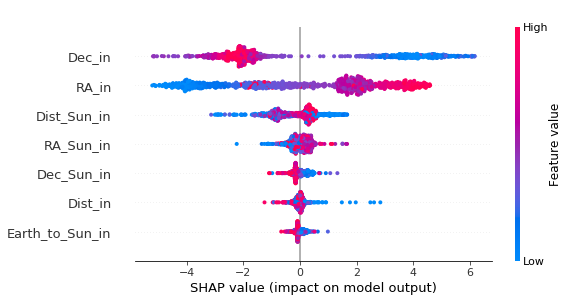

In [100]:
shap.summary_plot(shap_values, X[:1000])

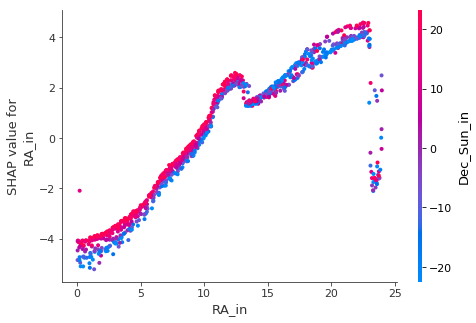

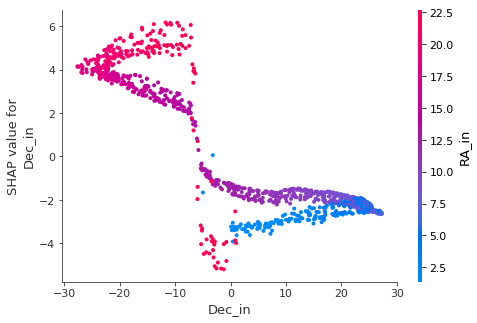

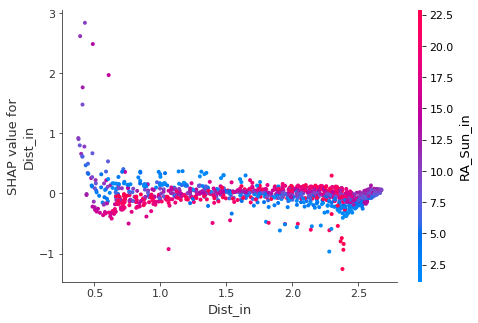

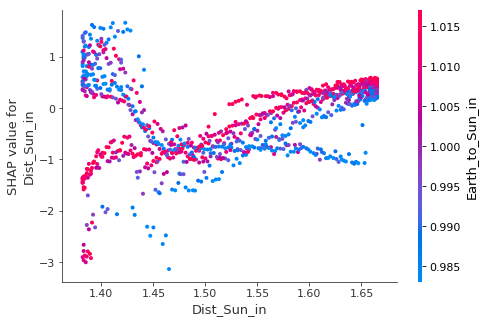

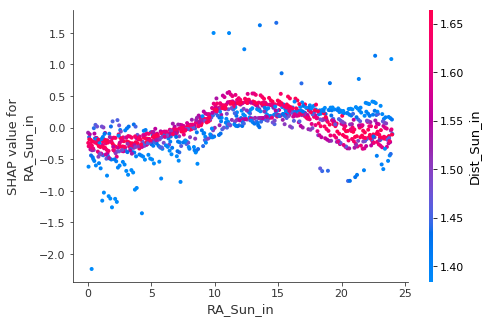

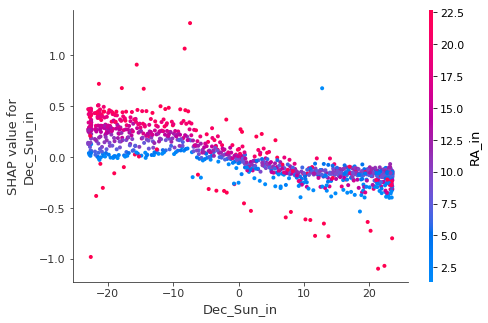

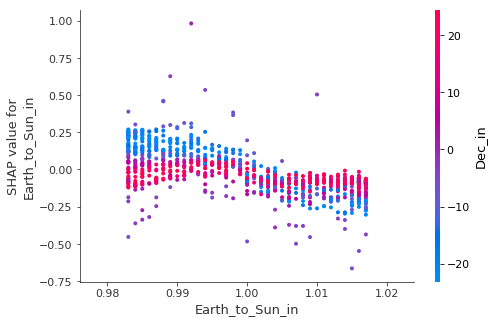

In [113]:
for col in X.columns:
    shap.dependence_plot(col, shap_values, X[:1000])

In [105]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

shap_pca50 = PCA(n_components=7).fit_transform(shap_values)
shap_embedded = TSNE(n_components=2, perplexity=50).fit_transform(shap_values)

In [108]:
import matplotlib.pyplot as pl
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator
cdict1 = {
    'red': ((0.0, 0.11764705882352941, 0.11764705882352941),
            (1.0, 0.9607843137254902, 0.9607843137254902)),

    'green': ((0.0, 0.5333333333333333, 0.5333333333333333),
              (1.0, 0.15294117647058825, 0.15294117647058825)),

    'blue': ((0.0, 0.8980392156862745, 0.8980392156862745),
             (1.0, 0.3411764705882353, 0.3411764705882353)),

    'alpha': ((0.0, 1, 1),
              (0.5, 1, 1),
              (1.0, 1, 1))
}  # #1E88E5 -> #ff0052
red_blue_solid = LinearSegmentedColormap('RedBlue', cdict1)

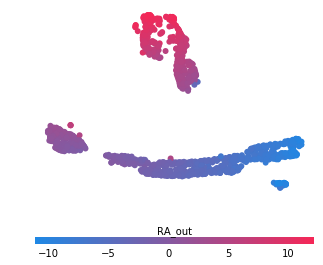

In [110]:
f = pl.figure(figsize=(5,5))
pl.scatter(shap_embedded[:,0],
           shap_embedded[:,1],
           c=shap_values[:1000,:].sum(1).astype(np.float64),
           linewidth=0, alpha=1., cmap=red_blue_solid)
cb = pl.colorbar(label="RA_out", aspect=40, orientation="horizontal")
cb.set_alpha(1)
cb.draw_all()
cb.outline.set_linewidth(0)
cb.ax.tick_params('x', length=0)
cb.ax.xaxis.set_label_position('top')
pl.gca().axis("off")
pl.show()

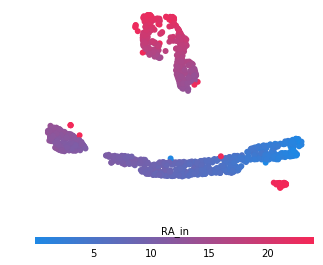

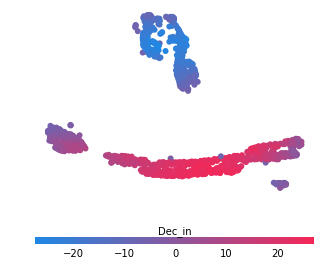

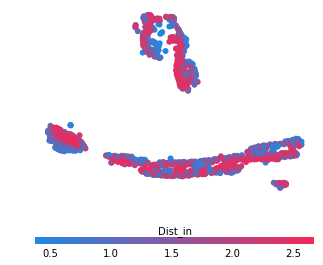

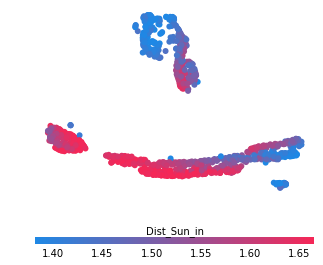

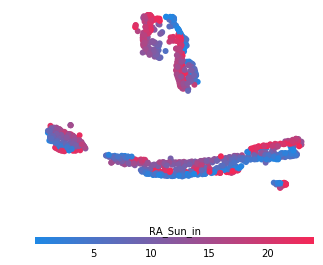

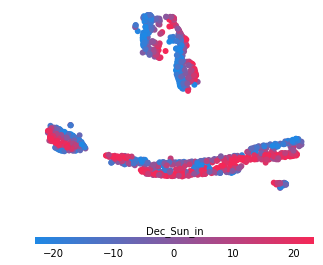

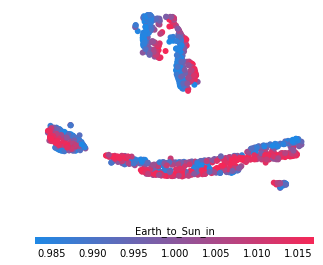

In [111]:
for feature in X.columns:
    f = pl.figure(figsize=(5,5))
    pl.scatter(shap_embedded[:,0],
               shap_embedded[:,1],
               c=X[feature].values[:1000].astype(np.float64),
               linewidth=0, alpha=1., cmap=red_blue_solid)
    cb = pl.colorbar(label=feature, aspect=40, orientation="horizontal")
    cb.set_alpha(1)
    cb.draw_all()
    cb.outline.set_linewidth(0)
    cb.ax.tick_params('x', length=0)
    cb.ax.xaxis.set_label_position('top')
    pl.gca().axis("off")
    pl.show()

In [124]:
import pickle
pickle.dump(shap_values, open("SHAP_RA_OUT.bin",'wb'))

In [114]:
y = full['Dec_out']
y.head()

0    22.048583
1    23.220889
2    24.429500
3    25.230889
4    25.316667
Name: Dec_out, dtype: float64

In [115]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X,y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 12.5min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=110,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [116]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': False}

In [117]:
rf = RandomForestRegressor(n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features='sqrt', max_depth=110, bootstrap=False)

In [118]:
rf.fit(X,y)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=110,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [119]:
residuals = y[-200:] - rf.predict(X[-200:])

In [120]:
np.mean(residuals)

0.0019102879783951777

In [121]:
np.std(residuals)

0.22801508723164743

In [122]:
np.sqrt(np.mean(residuals)**2+np.std(residuals)**2)

0.22802308919365202

In [125]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X[:1000])

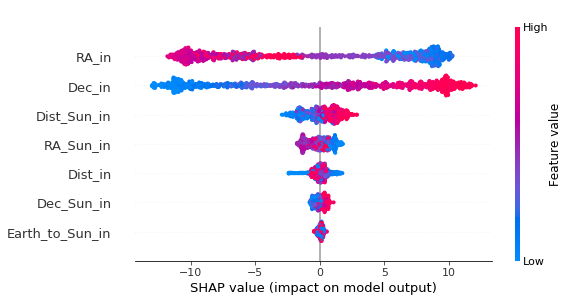

In [126]:
shap.summary_plot(shap_values, X[:1000])

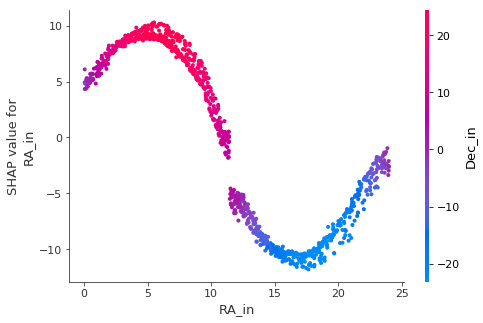

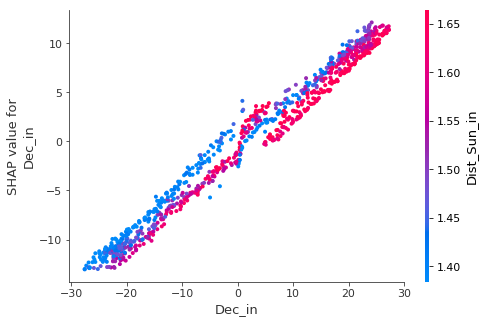

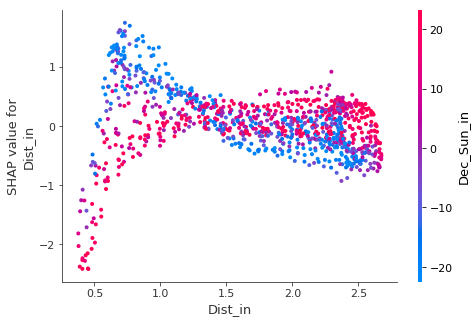

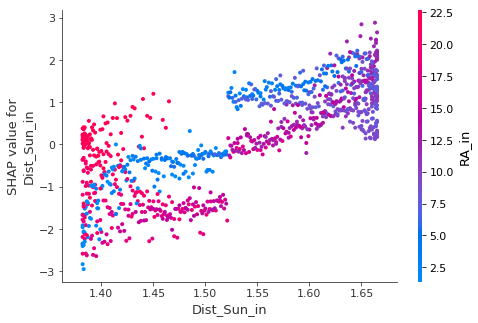

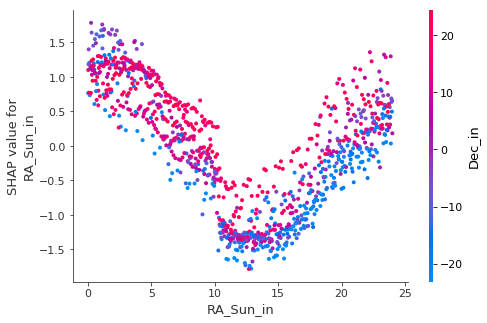

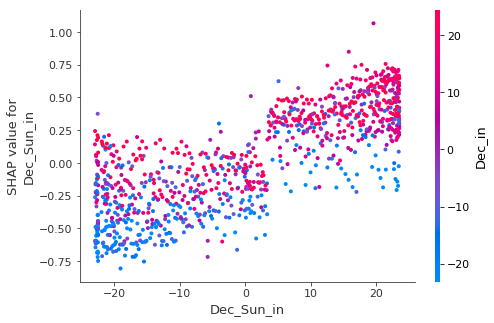

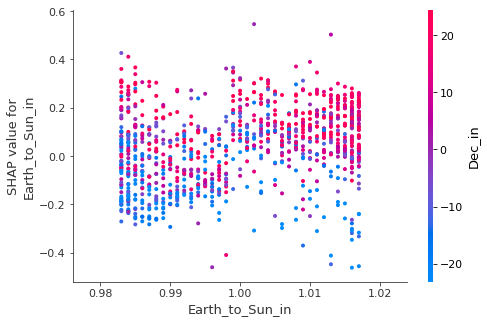

In [127]:
for col in X.columns:
    shap.dependence_plot(col, shap_values, X[:1000])

In [128]:
shap_pca50 = PCA(n_components=7).fit_transform(shap_values)
shap_embedded = TSNE(n_components=2, perplexity=50).fit_transform(shap_values)

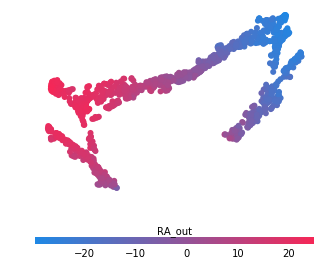

In [129]:
f = pl.figure(figsize=(5,5))
pl.scatter(shap_embedded[:,0],
           shap_embedded[:,1],
           c=shap_values[:1000,:].sum(1).astype(np.float64),
           linewidth=0, alpha=1., cmap=red_blue_solid)
cb = pl.colorbar(label="RA_out", aspect=40, orientation="horizontal")
cb.set_alpha(1)
cb.draw_all()
cb.outline.set_linewidth(0)
cb.ax.tick_params('x', length=0)
cb.ax.xaxis.set_label_position('top')
pl.gca().axis("off")
pl.show()

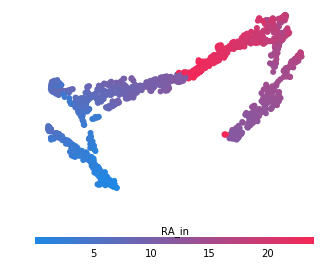

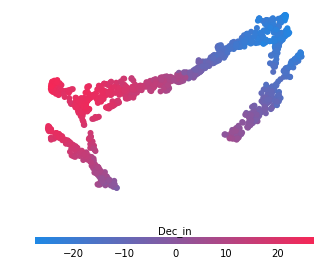

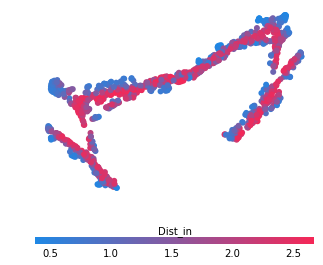

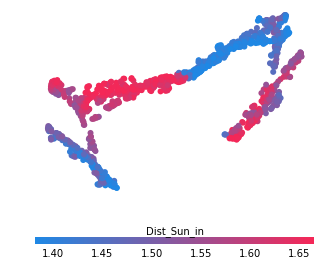

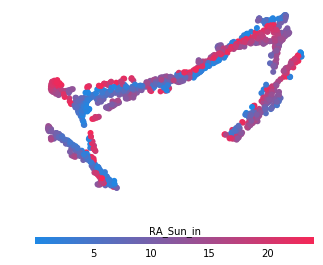

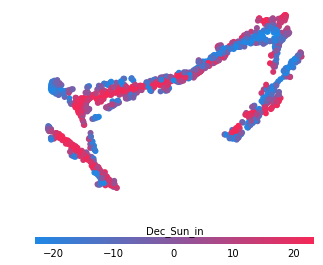

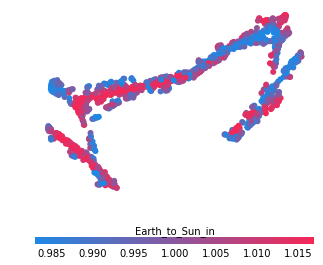

In [130]:
for feature in X.columns:
    f = pl.figure(figsize=(5,5))
    pl.scatter(shap_embedded[:,0],
               shap_embedded[:,1],
               c=X[feature].values[:1000].astype(np.float64),
               linewidth=0, alpha=1., cmap=red_blue_solid)
    cb = pl.colorbar(label=feature, aspect=40, orientation="horizontal")
    cb.set_alpha(1)
    cb.draw_all()
    cb.outline.set_linewidth(0)
    cb.ax.tick_params('x', length=0)
    cb.ax.xaxis.set_label_position('top')
    pl.gca().axis("off")
    pl.show()